In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from __future__ import division
from __future__ import print_function
from __future__ import absolute_import
from __future__ import unicode_literals  

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, norm

import IPython

sns.set(color_codes=True)
sns.set_style('white')

def ceil_divide(numer,denom):
    return (numer-1)//denom+1

In [3]:
num_seeds = 41
test_idx=6558
predicted_loss_diffs = [None] * num_seeds
for seed in range(num_seeds):
    f = np.load('../../scr/output-pre-june-1/mnist_small_all_cnn_c_hidden2_seed{}_wd1_damping2_iter-300000_predicted_loss_diffs-test-{}.npz'.format(seed, [test_idx]))
    predicted_loss_diffs[seed] = f['predicted_loss_diffs']
predicted_loss_diffs = np.array(predicted_loss_diffs)
print(predicted_loss_diffs[40,1173])
print(predicted_loss_diffs[0,1891])
print(predicted_loss_diffs[1,1735])
print(predicted_loss_diffs[2,4644])

0.034423975164240055
-0.015604020552201704
0.00044992481578480113
0.0025458415638316763


In [4]:
print(predicted_loss_diffs[0,1173])
print(predicted_loss_diffs[0,4644])
print(predicted_loss_diffs[0,1891])
print(predicted_loss_diffs[0,4936])
print(predicted_loss_diffs[0,1735])
print(predicted_loss_diffs[0,3562])

0.04643287242542614
0.03702172296697443
-0.015604020552201704
-0.018069068215110087
-0.015557435469193892
0.010386593905362215


0.983283338678708
0.9767315367161562
-0.0018965521131568928


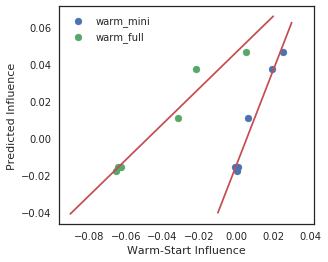

In [23]:
# Hidden2 model, seed 0, remove hand-picked 6
preds = [0.04657633833451705,0.03718114679509943,-0.015665244362571024,
    -0.018015397505326703,-0.015594533746892755, 0.010592052112926137]
warm_minibatch = [0.02539539337158203,0.019079208374023438,-0.000484466552734375,
     0.0004863739013671875,0.0010499954223632812,0.006374359130859375]
warm_fullbatch = [0.0050296783447265625,-0.021635055541992188,-0.06435680389404297,
    -0.06500053405761719,-0.0625300407409668,-0.031650543212890625]
actual = [0.622625827789,-0.043909072876,-0.145673751831,
          -0.152529716492,-0.266625881195,-0.0721840858459]

# lukewarm starts at 100k steps so it's "original" isn't quite accurate
#fake_diff = 6.295623 - 6.250319
#f = np.load('../../scr/output/mnist_small_all_cnn_c_hidden2_seed0_iter-100000_manual_warm_start_loss_diffs')
#lukewarm = f['actual_loss_diffs']
# This was the old lukewarm that didn't actually control batching -- nice that the
    # general shape / relative loss changes remain the same
#lukewarm = [0.4323887825012207,0.39583921432495117,0.3511061668395996,
#    0.30913209915161133,0.3274960517883301,0.3438286781311035]
#lukewarm = np.array(lukewarm) - fake_diff

# Simple convex model, LBFGS
#actual_lbfgs = [0.03135401010513306,0.014108836650848389,0.01621997356414795,
#    0.015986204147338867,0.01558595895767212,0.01475381851196289]
#preds_lbfgs = [0.01302282021262429, -0.0004739528569308194,0.0003183069662614302,
#    5.9985821897333316e-05,-0.0005934139598499645,-0.0022553393624045633]

actual_lbfgs = [-5.52624464e-03,  7.02738762e-05,  1.57290697e-03, -6.74724579e-05,
  2.57438421e-03,  6.16967678e-04]
preds_lbfgs = [-5.18374287e-03, -1.41117291e-04,  1.42021214e-03, -2.89855870e-05,
  2.25271832e-03,  6.52311932e-04]


actual_grad = [[-0.00824612379074,0.00343424081802,0.0051766037941,
               6.43730163574e-05,0.0164043903351,-0.00448709726334],
               [-0.00805389881134,0.00336337089539,0.00517481565475]]
preds_grad = [[0.000260520414873,0.000867840506814,0.00173918637362,
              -6.20893863114e-06,0.000115572582592,0.00018024856394],
              [0.000488156838851,0.000768400799144,0.00137516958063]]


plt.scatter(warm_minibatch, preds,label='warm_mini') #bias
plt.scatter(warm_fullbatch, preds,label='warm_full') #slightly different "hole"
plt.plot(np.linspace(-0.01,0.03), np.poly1d(np.polyfit(warm_minibatch, preds, 1))(np.linspace(-0.01,0.03)),color='r')
plt.plot(np.linspace(-0.09,0.02), np.poly1d(np.polyfit(warm_fullbatch, preds, 1))(np.linspace(-0.09,0.02)),color='r')
plt.xlabel('Warm-Start Influence')
plt.ylabel('Predicted Influence')
plt.axes().set_aspect('equal')
plt.legend(loc='upper left')
print(pearsonr(preds,warm_minibatch)[0])
print(pearsonr(preds,warm_fullbatch)[0])
fit = np.poly1d(np.polyfit(warm_minibatch, preds, 1))
print(fit(0.005))

0.004518539674814193


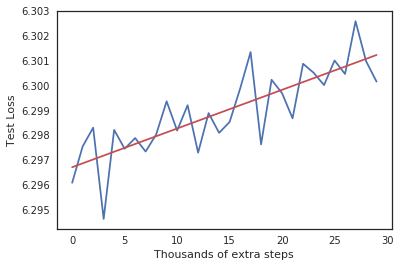

In [19]:
f = np.load('../../scr/output/more_retraining_losses.npz')
more_retraining_losses = f['losses']
more_retraining_losses[0] = 6.29608202
plt.plot(more_retraining_losses)
plt.plot(range(30), np.poly1d(np.polyfit(range(30), more_retraining_losses, 1))(range(30)),color='r')
plt.xlabel('Thousands of extra steps')
plt.ylabel('Test Loss')
fit = np.poly1d(np.polyfit(range(30), more_retraining_losses, 1))
print(fit(29)-fit(0))

In [6]:
#plt.scatter(lukewarm,preds) # I don't think batching order is properly controlled
#plt.xlabel('Lukewarm Influence')
#plt.ylabel('Predicted Influence')
#plt.axes().set_aspect('equal', 'datalim')
#print(pearsonr(preds,lukewarm)[0])

0.7887155778393422


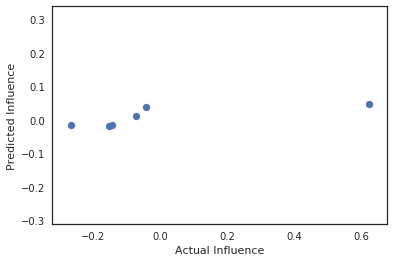

In [5]:
plt.scatter(actual,preds)
plt.xlabel('Actual Influence')
plt.ylabel('Predicted Influence')
plt.axes().set_aspect('equal', 'datalim')
print(pearsonr(preds,actual)[0])

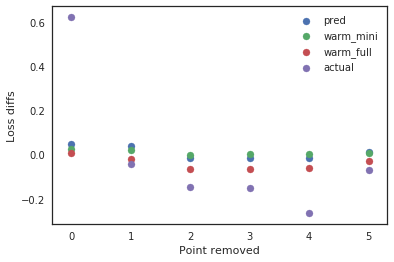

In [8]:
# Warm-start with full batch
plt.scatter(range(6),preds,label='pred') #blue
plt.scatter(range(6),warm_minibatch,label='warm_mini') #green
plt.scatter(range(6),warm_fullbatch,label='warm_full') #red
#plt.scatter(range(6),lukewarm) #purple
plt.scatter(range(6),actual,label='actual') #purple
plt.xlabel('Point removed')
plt.ylabel('Loss diffs')
plt.legend()

0.9991900394862152


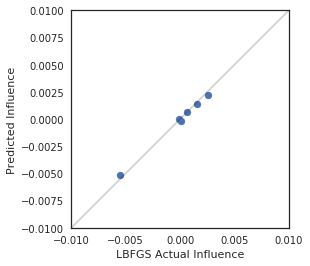

In [13]:
# doesn't match paper
plt.scatter(actual_lbfgs,preds_lbfgs)
plt.axes().set_aspect('equal')
plt.xlim(-0.01,0.01)
plt.ylim(-0.01,0.01)
plt.xlabel('LBFGS Actual Influence')
plt.ylabel('Predicted Influence')
plt.plot([-0.01, 0.01], [-0.01, 0.01], 'k-', alpha=0.2, zorder=1)
print(pearsonr(actual_lbfgs,preds_lbfgs)[0])

In [15]:
print(preds_lbfgs)
print(preds_grad)

[-0.00518374287, -0.000141117291, 0.00142021214, -2.8985587e-05, 0.00225271832, 0.000652311932]
[[0.000260520414873, 0.000867840506814, 0.00173918637362, -6.20893863114e-06, 0.000115572582592, 0.00018024856394], [0.000488156838851, 0.000768400799144, 0.00137516958063]]


0.15395703578605807


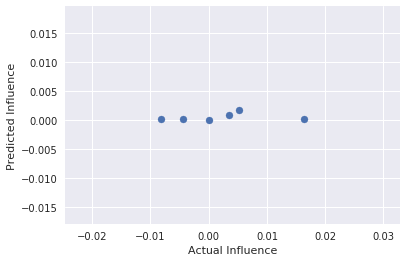

In [10]:
#seed 0
plt.scatter(actual_grad[0],preds_grad[0])
plt.xlabel('Actual Influence')
plt.ylabel('Predicted Influence')
plt.axes().set_aspect('equal', 'datalim')
print(pearsonr(actual_grad[0],preds_grad[0])[0])

0.8217088705767814


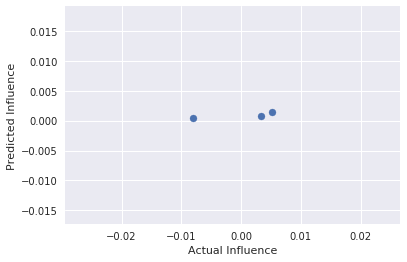

In [11]:
#seed 1
plt.scatter(actual_grad[1],preds_grad[1])
plt.xlabel('Actual Influence')
plt.ylabel('Predicted Influence')
plt.axes().set_aspect('equal', 'datalim')
print(pearsonr(actual_grad[1],preds_grad[1])[0])

0.9943140440027677
0.9999756562092846


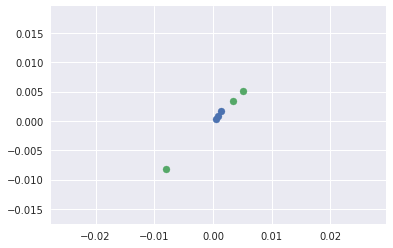

In [12]:
plt.scatter(preds_grad[1],preds_grad[0][:3])
plt.scatter(actual_grad[1],actual_grad[0][:3])
plt.axes().set_aspect('equal', 'datalim')
print(pearsonr(preds_grad[1],preds_grad[0][:3])[0])
print(pearsonr(actual_grad[1],actual_grad[0][:3])[0])